# Iris flower classification

**The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.**

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Necessary Dependencies
import numpy as np
import pandas as pd

## EXPLORATORY DATA ANALYSIS

In [3]:
# Load Dataset to Dataframe`
iris = pd.read_csv("C:/Users/uwaom/Desktop/Iris flower classification/IRIS.csv")
print(iris.head())
print('='*73)
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [4]:
# Number of Rows and Columns
iris.shape

(150, 5)

In [5]:
# Provides necessary information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Returns Statistical Information
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Returns Number of Duplicated Rows
iris.duplicated().sum()

3

In [8]:
# Return Number of Missing Values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Drops Duplicates
iris = iris.drop_duplicates()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris.duplicated().sum()

0

In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**No Duplicates**

In [12]:
# New Shape
iris.shape

(147, 5)

In [13]:
# New Info
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [14]:
# New Statistical Values
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Now, Here's the cCleaned DataSet**

In [15]:
# Returns Uniques Rows
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
# Returns Counts of Unique Rows
iris['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

## Visualization using plots and Charts

In [17]:
# Necessary Dependencies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Plot1 (Scatter Plot)**

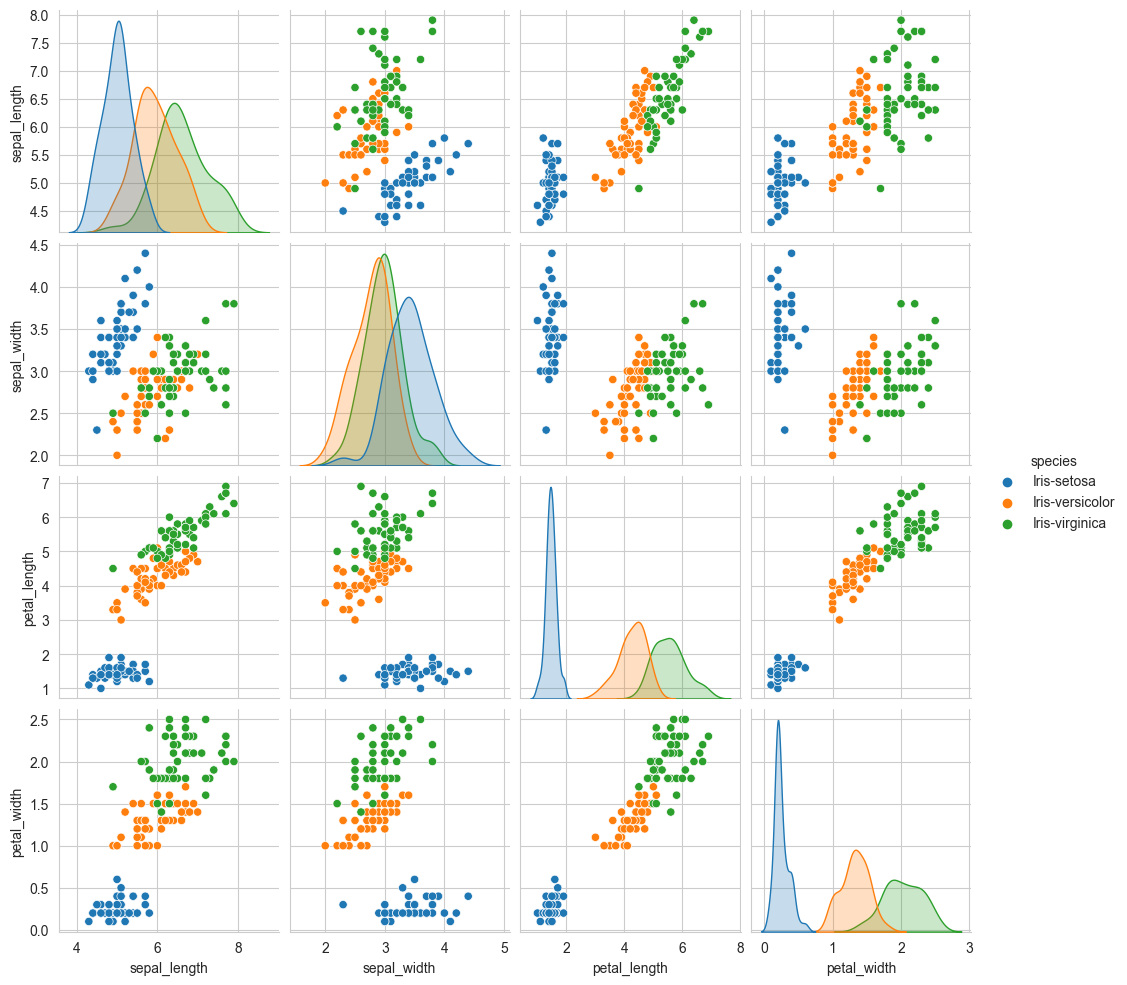

In [18]:
# Visualizing (the) Dataset
sns.pairplot(iris, hue='species')
plt.show()

**Plot 2 (Pie Chart)**

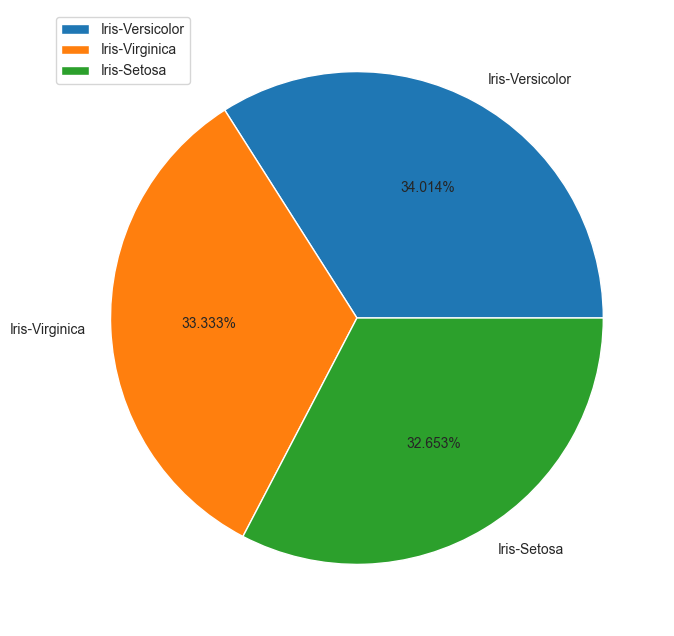

In [19]:
plt.figure(figsize=(8,8))
plt.pie(iris['species'].value_counts(), labels=['Iris-Versicolor', 'Iris-Virginica', 'Iris-Setosa'], autopct='%1.3f%%')
plt.legend(loc='upper left')
plt.show()

**Plot3 (Barplot)**

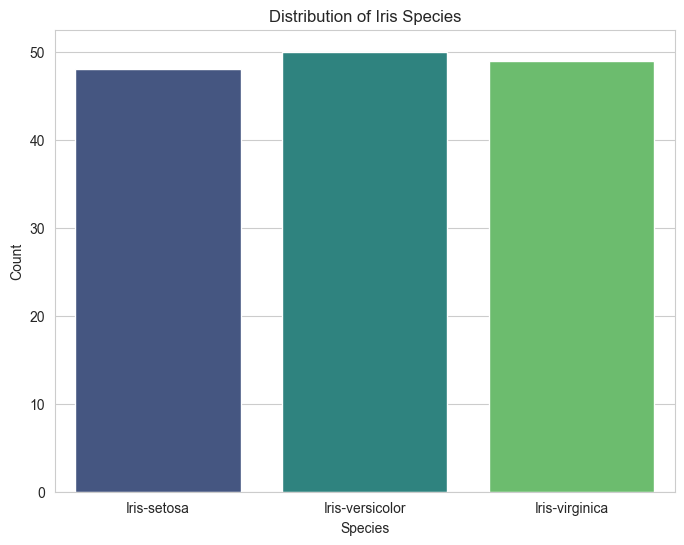

In [20]:
# Create a barplot for the 'species' column
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris, palette='viridis')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

**Visualization of Sepal and Petal length of the Flowers Species (Iris-Versicolor, Iris-Virginica, Iris-Setosa)**

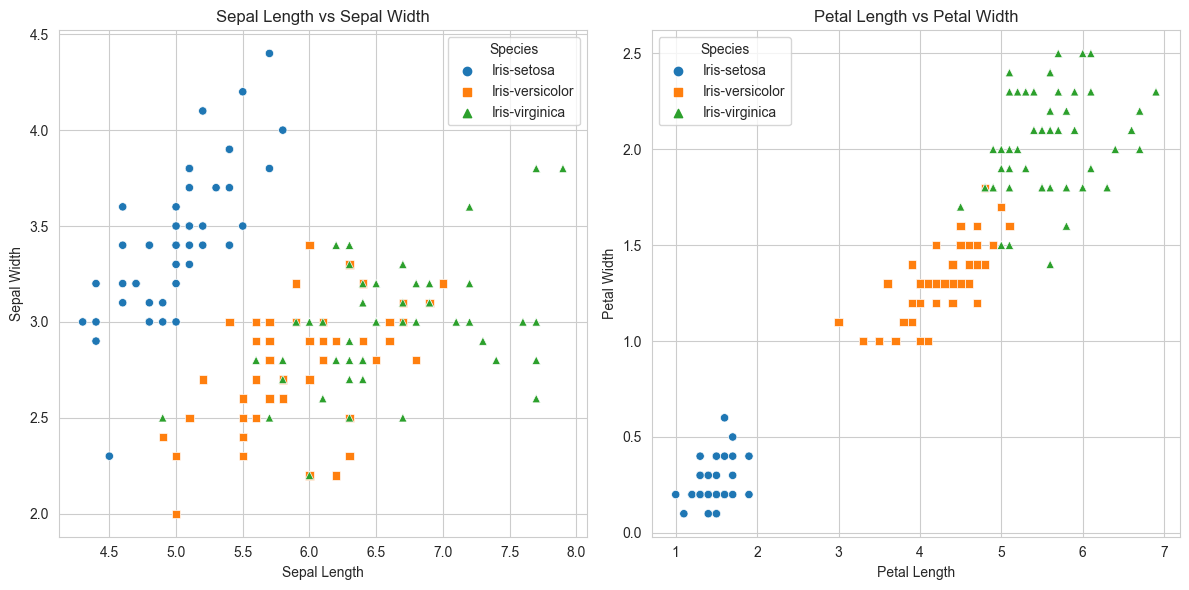

In [21]:
# Create separate scatter plots for sepal and petal measurements
plt.figure(figsize=(12, 6))

# Scatter plot for Sepal measurements
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species', style='species', markers=['o', 's', '^'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species', loc='upper right')

# Scatter plot for Petal measurements
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species', style='species', markers=['o', 's', '^'])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species', loc='upper left')

plt.tight_layout()
plt.show()


In [22]:
# Exclude the non-numeric column 'species'
num_cols = iris.select_dtypes(include=['float64', 'int64'])

# Calculate the correction matrix
corr_matrix = num_cols.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


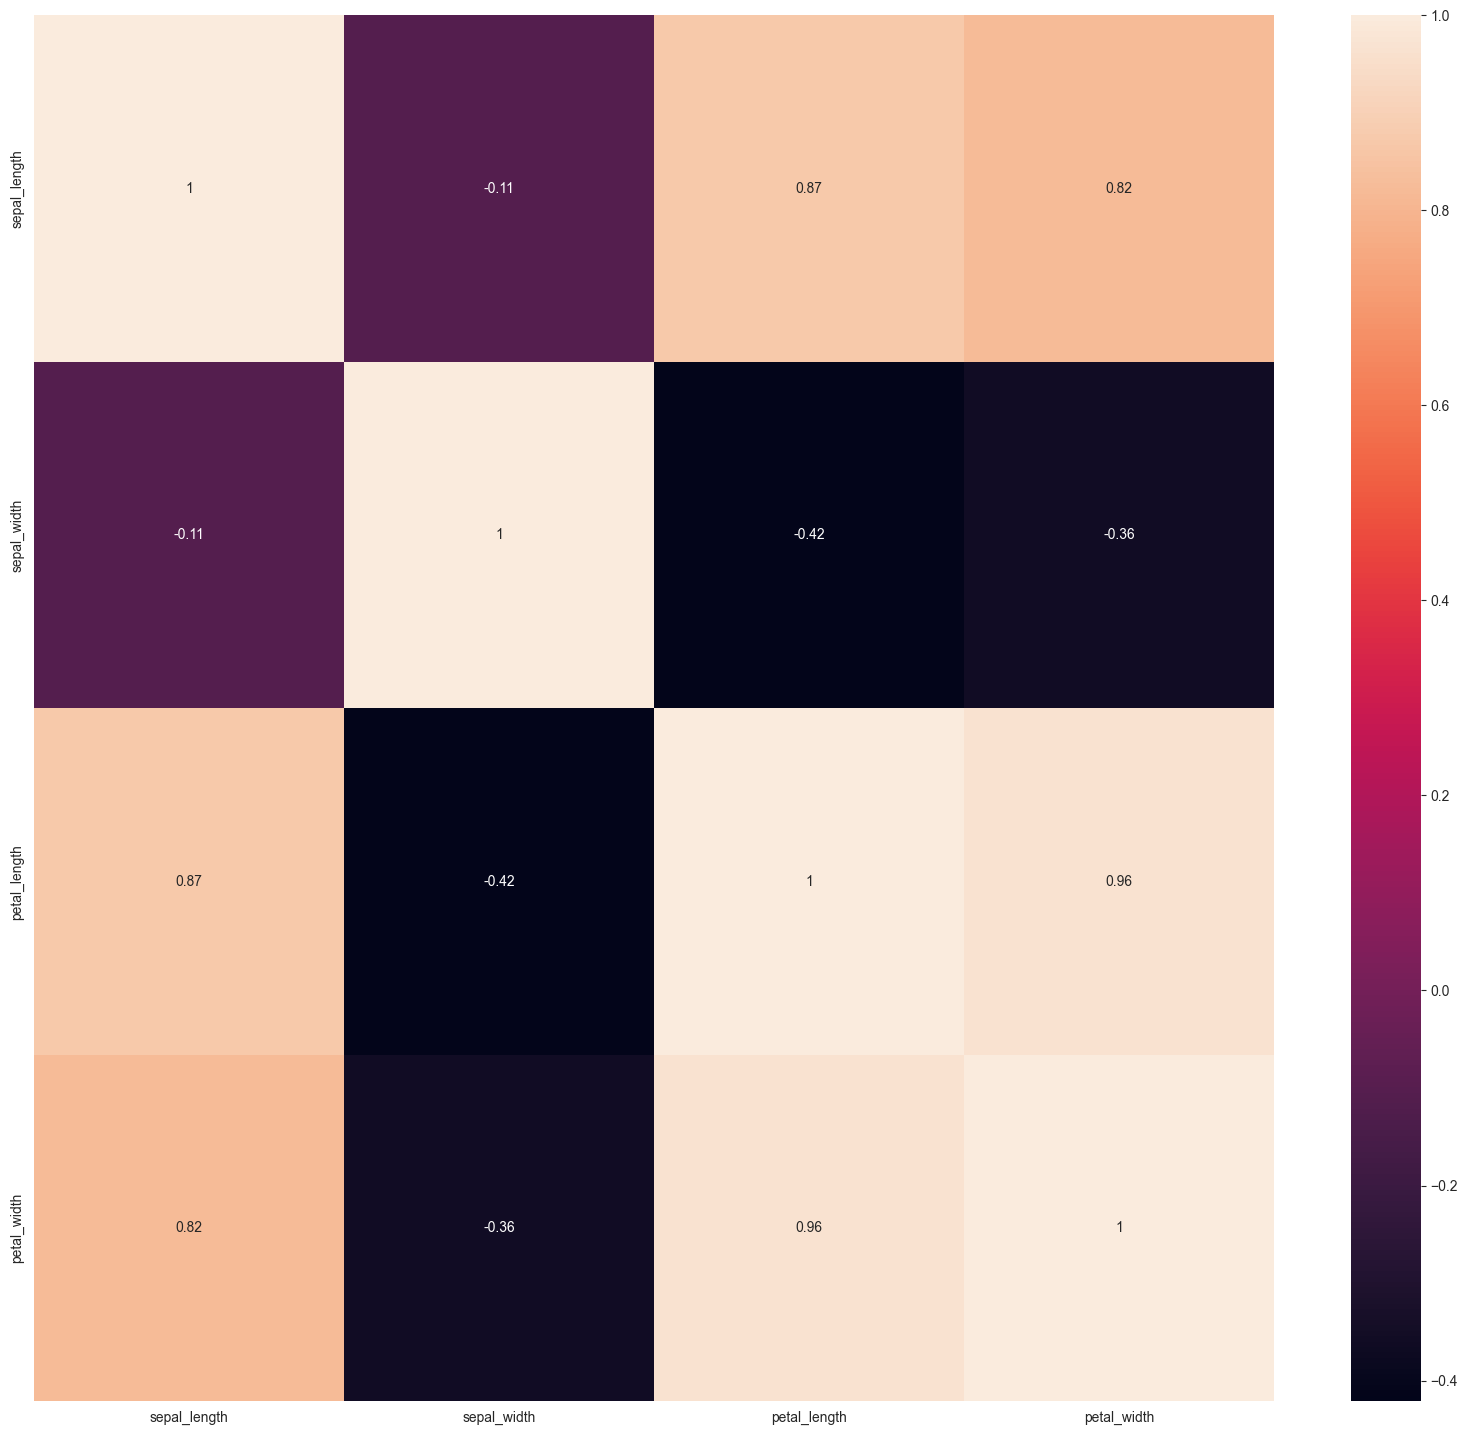

In [23]:
# Correlation Matrix
plt.figure(figsize=(20,18))
sns.heatmap(num_cols.corr(), annot=True)
plt.show()

## Data Preprocessing and Feature Selection

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lb = LabelEncoder()

In [26]:
iris['species'] = lb.fit_transform(iris['species'])

In [27]:
X = iris.drop(['species'], axis=1)
Y = iris['species']

In [28]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [29]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

## Train Test Split

In [31]:
# Importing dependency for Splitting the iris dataset into Train and Test Set
from sklearn.model_selection import train_test_split

In [32]:
# Splitting DataSet into Train Set and Test Set
X_train, x_test, Y_train, y_test =  train_test_split(X, Y, test_size=0.4, random_state=100)

In [33]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
94,5.6,2.7,4.2,1.3
115,6.4,3.2,5.3,2.3
5,5.4,3.9,1.7,0.4
38,4.4,3.0,1.3,0.2
...,...,...,...,...
89,5.5,2.5,4.0,1.3
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1
24,4.8,3.4,1.9,0.2


In [34]:
Y_train

22     0
94     1
115    2
5      0
38     0
      ..
89     1
105    2
69     1
24     0
8      0
Name: species, Length: 88, dtype: int32

In [35]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
15,5.7,4.4,1.5,0.4
112,6.8,3.0,5.5,2.1
120,6.9,3.2,5.7,2.3
11,4.8,3.4,1.6,0.2
138,6.0,3.0,4.8,1.8
127,6.1,3.0,4.9,1.8
124,6.7,3.3,5.7,2.1
48,5.3,3.7,1.5,0.2
134,6.1,2.6,5.6,1.4


In [36]:
y_test

114    2
15     0
112    2
120    2
11     0
138    2
127    2
124    2
48     0
134    2
111    2
78     1
28     0
118    2
32     0
131    2
149    2
71     1
103    2
56     1
26     0
92     1
146    2
53     1
16     0
116    2
29     0
39     0
64     1
87     1
107    2
42     0
135    2
106    2
43     0
132    2
6      0
25     0
21     0
9      0
23     0
36     0
91     1
122    2
104    2
75     1
77     1
117    2
90     1
80     1
33     0
12     0
47     0
79     1
125    2
20     0
44     0
145    2
83     1
Name: species, dtype: int32

In [37]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


In [38]:
iris_drop = iris.drop(columns='species', axis=1)

In [39]:
iris_drop

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


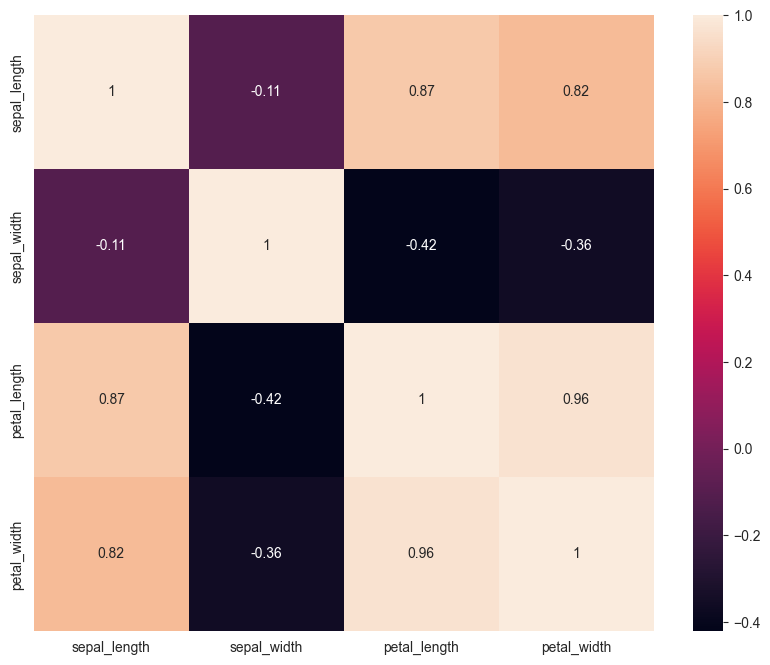

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(iris_drop.corr(), annot=True)
plt.show()

## Model Training (Fitting the Train Set into the Model)

#### LOGISTIC REGRESSION

**The Model used wil be Logistic Regression & Support Vector Classifier**

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logreg = LogisticRegression()

In [43]:
# Fitting the Train Set into the Model
logreg.fit(X_train, Y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import accuracy_score, classification_report

## Making Predictions Using the Test Set

In [45]:
# Predictions on Test Set
y_pred = logreg.predict(x_test)

In [46]:
y_pred

array([2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2])

In [47]:
# Model Evaluation on Test Set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred))

Accuracy: 0.9322033898305084

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.86      0.86      0.86        14
           2       0.91      0.91      0.91        23

    accuracy                           0.93        59
   macro avg       0.92      0.92      0.92        59
weighted avg       0.93      0.93      0.93        59



## Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix


# Construct confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_pred.round())
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)


Confusion Matrix for Test Data:
[[22  0  0]
 [ 0 12  2]
 [ 0  2 21]]


## Specificity and Sensitivity

In [49]:
# Confusion Matrix Format: [[TN, FP], [FN, TP]]


# Calculate Sensitivity and Specificity for Test Set
TN_test = test_conf_matrix[0, 0]
FP_test = test_conf_matrix[0, 1]
FN_test = test_conf_matrix[1, 0]
TP_test = test_conf_matrix[1, 1]

sensitivity_test = TP_test / (TP_test + FN_test)
specificity_test = TN_test / (TN_test + FP_test)

# Print the results
print("Logisitic Regression:")
print("Test Set  - Sensitivity:", sensitivity_test)
print("Test Set - Specificity:", specificity_test)

Logisitic Regression:
Test Set  - Sensitivity: 1.0
Test Set - Specificity: 1.0


#### SUPPORT VECTOR MACHINE (SVM)

In [50]:
# Importing Support Vector Classifier (SVC) from sklearn.svm Module
from sklearn.svm import SVC

In [51]:
# Instantiating SVC() as svc
svc = SVC()

In [52]:
# Fitting the Training Data into Support Vector Classifier
svc.fit(X_train, Y_train)

SVC()

In [53]:
from sklearn.metrics import accuracy_score

## Predictions on the Test Set

In [54]:
y_pred_svm = svc.predict(x_test)

In [55]:
y_pred_svm

array([2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1])

In [56]:
# Model Evaluation on the Test Set
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.9491525423728814

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.82      1.00      0.90        14
           2       1.00      0.87      0.93        23

    accuracy                           0.95        59
   macro avg       0.94      0.96      0.94        59
weighted avg       0.96      0.95      0.95        59



## Confusion Matrix

In [57]:
# Construct confusion matrix for test data
test_conf_matrix_svm = confusion_matrix(y_test, y_pred_svm.round())
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix_svm)


Confusion Matrix for Test Data:
[[22  0  0]
 [ 0 14  0]
 [ 0  3 20]]


## Sensitivity and Specificity

In [58]:
# Confusion Matrix Format: [[TN, FP], [FN, TP]]


# Calculate Sensitivity and Specificity for Test Set
TN_test = test_conf_matrix_svm[0, 0]
FP_test = test_conf_matrix_svm[0, 1]
FN_test = test_conf_matrix_svm[1, 0]
TP_test = test_conf_matrix_svm[1, 1]

sensitivity_test = TP_test / (TP_test + FN_test)
specificity_test = TN_test / (TN_test + FP_test)

# Print the results
print("Support Vector Classifier:")
print("Test Set - Sensitivity:", sensitivity_test)
print("Test Set - Specificity:", specificity_test)

Support Vector Classifier:
Test Set - Sensitivity: 1.0
Test Set - Specificity: 1.0
